__DATA ANALYSIS OF EDUCATIONAL MANAGEMENT SYSTEMS__


In [2]:
#! usr/bin/env python 3
#coding: utf-8


import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt


# Transforming input files.csv to dataframes

df_Data = pd.read_csv("EdStatsData.csv")
df_FootNote = pd.read_csv("EdStatsFootNote.csv")
df_Country = pd.read_csv("EdStatsCountry.csv")
df_Series = pd.read_csv("EdStatsSeries.csv")
df_CountrySeries = pd.read_csv("EdStatsCountry-Series.csv")


__FEW FONCTIONS DEFINED TO HELP DESCRIBING THE CHARACTERISTICS OF THE INPUT FILES__


In [13]:
# Duplicates: Calculate the number of duplicates in dataframe "data" 

def Duplicates(data):
    return len(data)-len(data.drop_duplicates())

# Missing_cells: Calculate the number of empty cells in dataframe "data" 

def Missing_Cells(data):
        return data.isna().sum().sum()

# Missing_Cells_percent: Calculate the percentage of empty cells in dataframe "data" 

def Missing_Cells_percent(data):
        return Missing_Cells(data)/(data.size)*100
    
# Filled_Cells: Calculate the number of existing values in dataframe "data"

def Filled_Cells (data):
        return data.notna().sum()  
    
# Filled_Cells_percent: Calculate the percentage of existing values in dataframe "data"

def Filled_Cells_percent (data):
        return Filled_Cells(data)/(len(data.index))*100

__CREATION OF A DATAFRAME SUMMARIZING KEY INFO FROM THE INPUT FILES__


In [11]:
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

list_files = ['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv', 'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']
files_spec = {'Total rows' : pd.Series([len(df_Data), len(df_FootNote), len(df_Country), len(df_Series),
                                        len(df_CountrySeries)],
                       index = list_files),
      'Total columns' : pd.Series([len(df_Data.columns), len(df_FootNote.columns), len(df_Country.columns),
                                       len(df_Series.columns), len(df_CountrySeries.columns)],
                        index = list_files),
             'Total duplicates' : pd.Series([Duplicates(df_Data), Duplicates(df_FootNote), Duplicates(df_Country),
                                       Duplicates(df_Series), Duplicates(df_CountrySeries)],
                        index = list_files),
             'Total Missing cells ' : pd.Series([Missing_Cells(df_Data), Missing_Cells(df_FootNote), Missing_Cells(df_Country),
                                       Missing_Cells(df_Series), Missing_Cells(df_CountrySeries)],
                        index = list_files),
             'Missing cells (%)' : pd.Series([Missing_Cells_percent(df_Data), Missing_Cells_percent(df_FootNote), 
                                                        Missing_Cells_percent(df_Country), Missing_Cells_percent(df_Series),
                                                        Missing_Cells_percent(df_CountrySeries)],
                        index = list_files)}

# Creates Dataframe df_files_spec

df_files_spec = pd.DataFrame(files_spec)
index = df_files_spec.index
index. name = "Input File Name"
round(df_files_spec, 2)



,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
EdStatsData.csv,886930,70,0,53455179,86.10
EdStatsFootNote.csv,643638,5,0,643638,20.00
EdStatsCountry.csv,241,32,0,2354,30.52
EdStatsSeries.csv,3665,21,0,55203,71.72
EdStatsCountry-Series.csv,613,4,0,613,25.00


__OVERVIEW OF THE DIFFERENT INPUT FILES__


In [5]:
#df_list = ['df_Data' , 'df_FootNote', 'df_Country', 'df_Series', 'df_CountrySeries']

#for df in df_list:    
#    print(df_list)
#    print(df.head(2))
#    print('======')

df_Data.head(2)

# Data numbers for all indicators/region/country

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_FootNote.head(2)

# Description of where the data come from

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [7]:
df_Country.head(2)

# Countries economical description

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [8]:
df_Series.head(2)

# Details description of indicators

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_CountrySeries.head(2)

# Country codes and data sources

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


__DETAILED INSPECTION OF THE LAST COLUMN "Unnamed" IN EACH FILE__


In [14]:
unnamed_col = {'Column Name' : pd.Series(['Unnamed: 69', 'Unnamed: 4', 'Unnamed: 31', 'Unnamed: 20', 'Unnamed: 3'],
                                 index = list_files),
                 'Existing Data' : pd.Series([Filled_Cells(df_Data['Unnamed: 69']), Filled_Cells(df_FootNote['Unnamed: 4']),
                                              Filled_Cells(df_Country['Unnamed: 31']), Filled_Cells(df_Series['Unnamed: 20']),
                                            Filled_Cells(df_CountrySeries['Unnamed: 3'])], 
                                    index = list_files)}
                               
df_unnamed_col = pd.DataFrame(unnamed_col)
index = df_unnamed_col.index
index. name = "Input File Name"
df_unnamed_col


,Column Name,Existing Data
Input File Name,,
EdStatsData.csv,Unnamed: 69,0
EdStatsFootNote.csv,Unnamed: 4,0
EdStatsCountry.csv,Unnamed: 31,0
EdStatsSeries.csv,Unnamed: 20,0
EdStatsCountry-Series.csv,Unnamed: 3,0


__LAST COLUMN "Unnamed" DELETED IN EACH FILE (NO DATA)__


In [15]:
df_Data = df_Data.drop(['Unnamed: 69'], axis=1)
df_FootNote = df_FootNote.drop(['Unnamed: 4'], axis=1)
df_Country = df_Country.drop(['Unnamed: 31'], axis=1)
df_Series = df_Series.drop(['Unnamed: 20'], axis=1)
df_CountrySeries = df_CountrySeries.drop(['Unnamed: 3'], axis=1)


__OVERVIEW OF THE LABEL "Country Name" & ITS ASSOCIATED LABEL "Country Code" FROM df_Data__


In [16]:
cols = [col for col in df_Data.columns if col in ['Country Name', 'Country Code']]
df2 = df_Data[cols]
df2.drop_duplicates()


,Country Name,Country Code
0,Arab World,ARB
3665,East Asia & Pacific,EAS
7330,East Asia & Pacific (excluding high income),EAP
10995,Euro area,EMU
14660,Europe & Central Asia,ECS
...,...,...
868605,Virgin Islands (U.S.),VIR
872270,West Bank and Gaza,PSE
875935,"Yemen, Rep.",YEM
879600,Zambia,ZMB


__WORLD REGIONS SEPARATION FROM INDIVIDUAL COUNTRIES & NON-GEOGRAPHIC CATEGORIES from df_Data__


In [18]:
# Among these 242 different labels 'Country Code', few describe whole regions or income based areas. 
# The rest represent individual countries.

# List of pertinent regions ("Country Code based")

list_regions = ['EUU', 'NAC', 'SAS', 'LCN', 'ARB', 'SSF', 'MEA', 'EAS', 'ECS']
df_regions = df_Data[df_Data['Country Code'].isin(list_regions)] 

# List of non-geographic regions ("Country Code" based)

list_non_country = (['EMU', 'HPC', 'HIC', 'LMY', 'LDC', 'LIC', 'LMC', 'MIC',
                    'OED', 'UMC', 'WLD', 'ECA', 'LAC', 'EAP', 'SSA', 'MNA'])
df_non_country = df_Data[df_Data['Country Code'].isin(list_non_country)]

# List of individual countries by substraction

list_country_left = list_regions + list_non_country
df_country_left = df_Data[~df_Data['Country Code'].isin(list_country_left)]


__OVERVIEW OF THE NUMBER OF "Country Name" IN THE RESULTING DATAFRAMES__

In [19]:
list_subfiles = ['df_regions', 'df_non_country', 'df_country_left']
subfiles_spec = {'Unique Country Name' : pd.Series([df_regions['Country Name'].nunique(), 
                                                    df_non_country['Country Name'].nunique(),
                                                    df_country_left['Country Name'].nunique()],
                                       index = list_subfiles)}

# Creates Dataframe df_subfiles_spec

df_subfiles_spec = pd.DataFrame(subfiles_spec)
index = df_subfiles_spec.index
index. name = "Resulting dataframes"
df_subfiles_spec



,Unique Country Name
Resulting dataframes,
df_regions,9
df_non_country,16
df_country_left,217


__DATA CLEANING: 1st PHASE - CHOICE BY EXCLUSION: INDICATORS SEMANTIC ANALYSIS__


We have 3665 unique indicators and want to go down to ~15 pertinent ones
We eliminate all indicators that contain the following keywords (not pertinent with the business goals)

In [21]:
non_keywords=['EGRA', 'Adult', 'adult', 'Elderly', 'Male', 'male', 'Inbound', 'inbound', 'outbound', 'literacy', 'Out', 
              'primary', 'Primary', 'Gini', 'ISCED ', 'Wittgenstein','PIRLS', 'Official', 'Mortality', 'Africa', 'repeaters',
              'Repetition', 'Average', 'Score','lower secondary', 'HIV', 'childhood','PISA', 'MICS', 'TIMSS', 'DHS', 'SACMEQ',
              'PASEC', 'LLECE', 'SABER', 'salaries', 'compulsory', 'gender', 'Gender']

df_country_non_keywords = df_country_left[~df_country_left['Indicator Name'].str.contains('|'.join(non_keywords))]
len(df_country_non_keywords['Indicator Name'].unique())

328

This 1st phase of exclusion makes the number of indicators to drop from 3665 down to 328

__INTERNET YEARS - TIMEFRAME RESTRICTION YEARS+2000 TIL DATE OF STUDY 2016__


In [22]:
# df_Subcountry1: All data within 2000 to 2016

df_subcountry = df_country_non_keywords.drop(df_country_non_keywords.loc[:, '2017':'2100'].columns, axis = 1)
df_subcountry1 = df_subcountry.drop(df_subcountry.loc[:, '1970':'1999'].columns, axis = 1)


__DATA CLEANING: 2nd PHASE - CHOICE BY EXCLUSION: AVAILABILITY OF INDICATORS__


We eliminate all indicators data that are not - at least - 60% available over the 2000-2016 period

In [23]:
Filter = 0.6
limitPer = len(df_subcountry1.columns) * Filter
df_subcountry2 = df_subcountry1.dropna(thresh=limitPer, axis=0)
len(df_subcountry2['Indicator Name'].unique())

231

__Essai de boucle sur filtre__

In [24]:
for i in range (0, 100, 10):
    Filter = i/100
    limitPer = len(df_subcountry1.columns) * Filter
    df_subcountry2 = df_subcountry1.dropna(thresh=limitPer, axis=0)

    def Uno (data):
        return len(data.unique())

    print(Uno(df_subcountry2['Indicator Name']))
#Uno(df_subcountry2['Indicator Name'])
#r = range (0, 110, 10)
#List = [*r]
#Test2 = {'Indicators left': pd.Series(Uno(df_subcountry2['Indicator Name']), index = List )}  
#df_Test2 = pd.DataFrame(Test2)
#df_Test2


328
328
328
324
234
231
231
229
227
188


__DATA CLEANING: 3rd PHASE - CHOICE BY INCLUSION__


Among the 231 remaining indicators, we choose ~10 that seem pertinent to our problematic

In [25]:
Indicators=[ 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW', 
            'UIS.GTVP.3.GPV', 'UIS.GTVP.23.GPV', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']
#'SP.POP.TOTL', 'NY.GDP.MKTP.PP.CD', 'NY.GNP.MKTP.PP.CD'
df_country_indicators = df_subcountry2[df_subcountry2['Indicator Code'].isin(Indicators)]


__MERGE INFO 'Region' FROM 'df_Country' WITH 'df_Data'__ 

To relate the different countries with their corresponding region, we import the 'Region' column from dataframe df_Country into a new dataframe where all useful information are gathered.

In [27]:
col_list = ['Country Code', 'Region']
df_Countrysubset = df_Country[col_list]

df_indic_combined = pd.merge(df_country_indicators, df_Countrysubset) 
column_to_move = df_indic_combined.pop("Region")
df_indic_combined.insert(2, "Region", column_to_move)

df_indic_combined.head(2).append(df_indic_combined.tail(2))


,Country Name,Country Code,Region,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,South Asia,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,...,1.900000,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
1,Afghanistan,AFG,South Asia,Population growth (annual %),SP.POP.GROW,3.494659,4.251504,4.720528,4.818041,4.468918,...,2.755225,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163
928,Zimbabwe,ZWE,Sub-Saharan Africa,Population growth (annual %),SP.POP.GROW,1.298782,1.170597,1.080653,1.061280,1.130323,...,1.554735,1.700106,1.842497,1.976756,2.109672,2.228306,2.309366,2.344799,2.345643,2.336070
929,Zimbabwe,ZWE,Sub-Saharan Africa,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,4.700000,6.100000,5.200000,4.500000,4.200000,...,5.500000,5.400000,5.500000,6.200000,5.400000,5.300000,5.200000,5.100000,5.100000,5.200000


**DISPLAY OF THE PERTINENT INDICATORS**

We generate a dataframe that lists the remaining indicators

In [29]:
series_indic = df_Series[df_Series['Series Code'].isin(Indicators)]

list_indicators = pd.DataFrame(columns=['Series Code', 'Long definition', 'Topic'])

for indic in series_indic.iterrows():
   
        list_indicators = list_indicators.append(pd.DataFrame([[indic[1]['Series Code'], indic[1]['Long definition'],
                                                                indic[1]['Topic']]],
                                                              columns=['Series Code','Long definition', 'Topic']))
        list_indicators.index = np.arange(1, len(list_indicators)+1)

        list_indicators.to_csv("List_indicators.csv")
list_indicators

,Series Code,Long definition,Topic
1,IT.NET.USER.P2,Internet users are individuals who have used t...,Infrastructure: Communications
2,SE.SEC.ENRR,"Total enrollment in secondary education, regar...",Secondary
3,SE.SEC.ENRR.UP,"Total enrollment in upper secondary education,...",Secondary
4,SE.TER.ENRR,Total enrollment in tertiary education (ISCED ...,Tertiary
5,SL.UEM.TOTL.ZS,Unemployment refers to the share of the labor ...,Social Protection & Labor: Unemployment
6,SP.POP.GROW,Annual population growth rate for year t is th...,Health: Population: Dynamics
7,UIS.GTVP.23.GPV,Total number of students enrolled in general p...,Secondary
8,UIS.GTVP.3.GPV,Total number of students enrolled in general p...,Secondary


__OVERVIEW OF THE MEAN VALUES PER INDICATOR & YEAR__

In [30]:
code = df_indic_combined.groupby(['Indicator Code']).mean()
code

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,
IT.NET.USER.P2,8.536151,10.531790,13.777208,16.209658,18.598198,20.646648,23.170792,25.644739,28.363023,31.065357,34.486274,37.192817,40.257972,43.003584,45.944783,48.920031,51.355694
SE.SEC.ENRR,79.286590,80.038963,81.915281,85.293873,81.815613,82.337724,82.349348,84.185829,84.151232,84.536545,87.294193,86.459448,87.319699,91.174773,92.567560,90.774195,76.618655
SE.SEC.ENRR.UP,73.194589,72.833713,75.092944,78.646290,74.490474,74.952366,75.079894,76.583762,77.832885,77.639326,80.218631,79.881238,81.629251,86.129572,87.986571,85.642976,65.503318
SE.TER.ENRR,34.365888,35.588558,37.485393,39.693566,41.690979,42.912429,44.083305,45.513692,46.774690,48.124978,48.936738,50.629515,51.494346,51.920975,52.997095,51.517210,14.944604
SL.UEM.TOTL.ZS,9.289247,9.409140,9.508602,9.556452,9.377419,9.080107,8.678495,8.395699,8.154839,8.960753,9.130645,9.119355,9.132796,9.112903,8.990323,8.833871,8.689247
SP.POP.GROW,1.456019,1.455738,1.448532,1.425106,1.459676,1.487471,1.524540,1.523217,1.528083,1.460408,1.425314,1.369467,1.376446,1.352220,1.323492,1.305702,1.294801
UIS.GTVP.23.GPV,83.774682,83.538927,83.492002,83.312971,83.078028,83.136351,83.581698,83.398020,83.398518,83.241223,82.880535,83.155711,82.915308,81.642947,81.920987,98.744816,NaN
UIS.GTVP.3.GPV,66.008834,65.917305,65.810440,66.036165,65.054439,65.623291,66.545908,66.715466,66.843875,66.712186,66.164824,66.919057,66.503213,65.906797,66.578404,96.577179,NaN


__STATISTICAL EXPLORATION__

__CORRELATION MATRIX:__ Investigation of the dependence between all indicators at the same time__

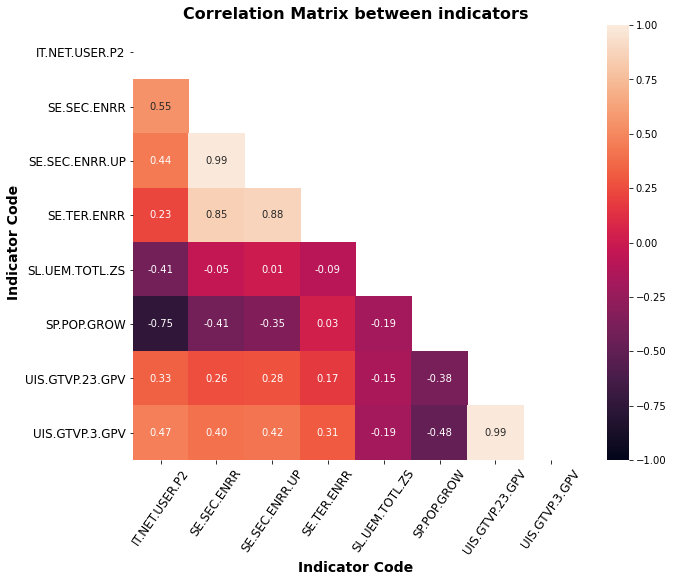

In [31]:
correlation_mat = code.transpose().corr()
plt.figure(figsize=(10,8))

tricor = np.triu(correlation_mat)
res = sns.heatmap(correlation_mat, vmin=-1, vmax=1, center= None, annot = True, fmt='.2f', annot_kws={"size": 10}, mask=tricor)
plt.title('Correlation Matrix between indicators', fontsize = 16, weight = 'bold')
plt.xlabel ('Indicator Code', fontsize=14, weight = 'bold')
plt.ylabel ('Indicator Code', fontsize=14, weight = 'bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12, rotation=55)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()


__Interactions between continuous variables using seaborn pairplot__

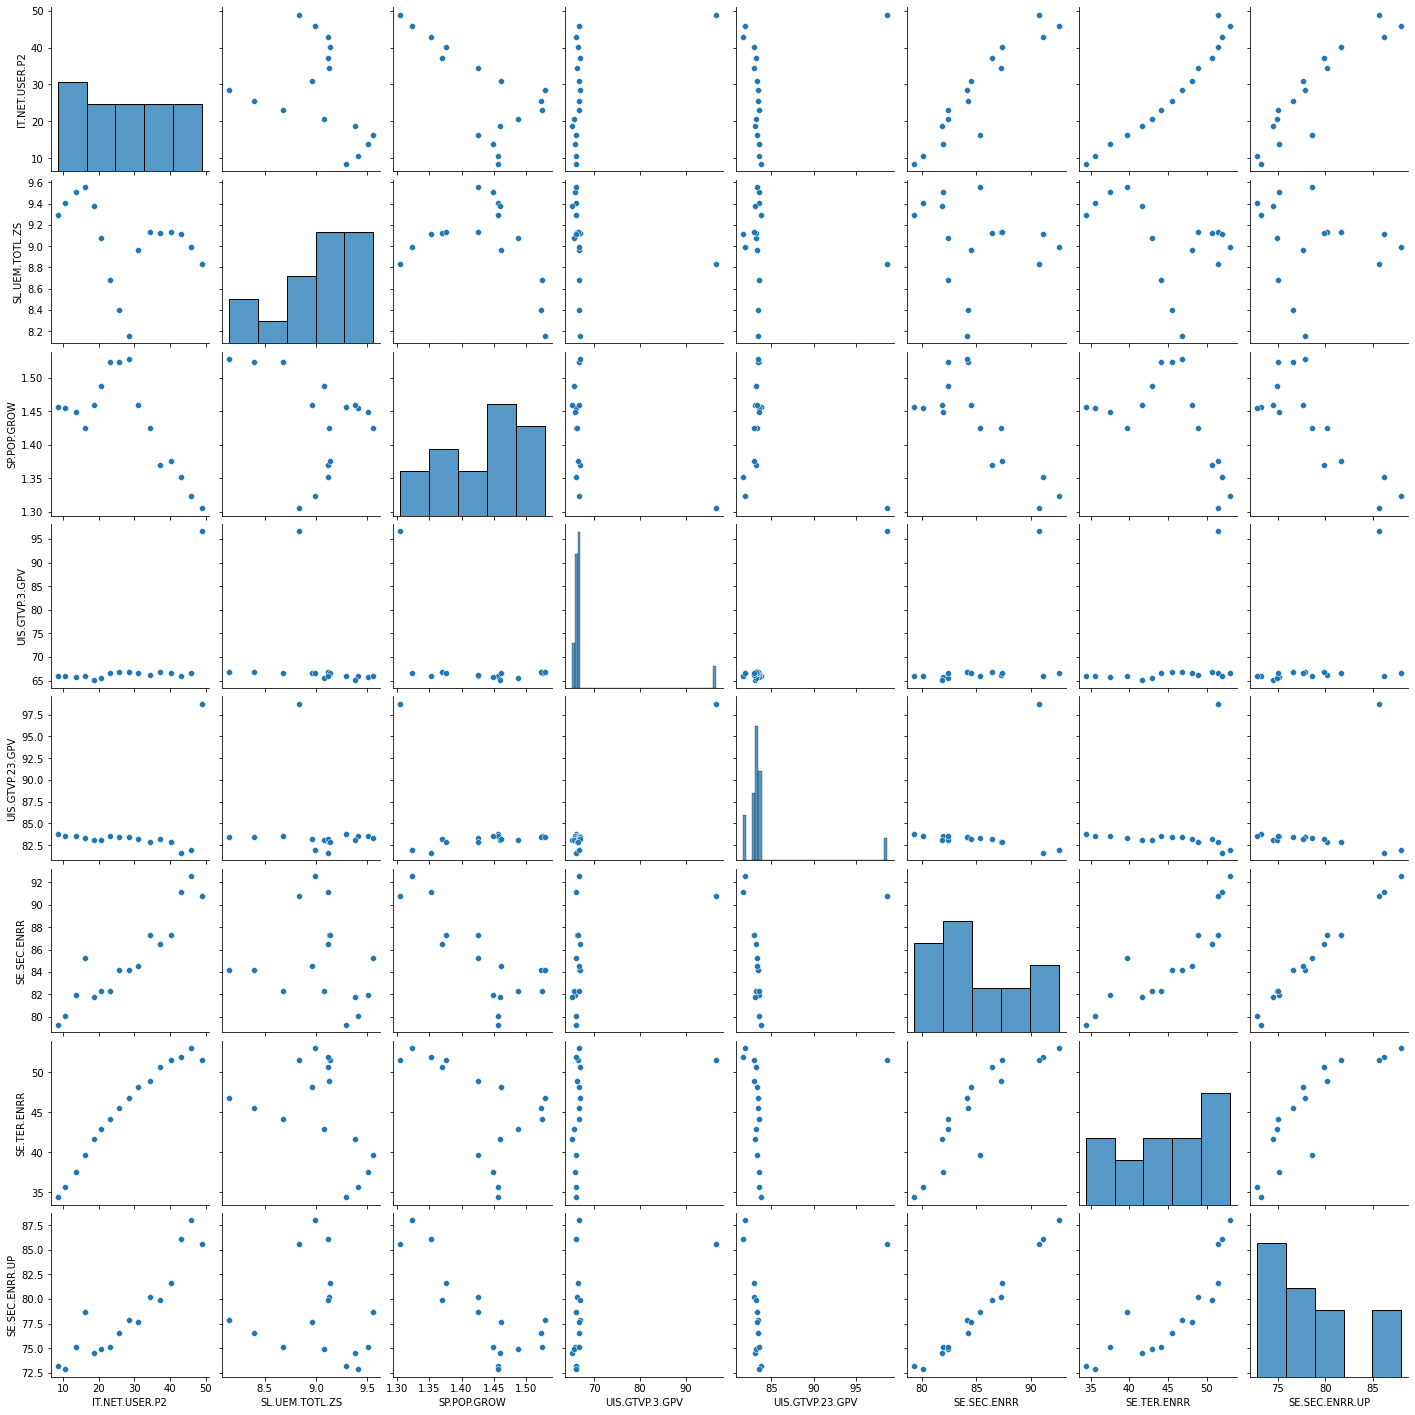

In [32]:
invert_code = code.T

dispersion = invert_code[[ 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW',
            'UIS.GTVP.3.GPV', 'UIS.GTVP.23.GPV', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']].loc[:'2015']


scatter = sns.pairplot(dispersion)

We regroup the indicators by region and country to have an idea of the average value

In [35]:
regions_list = df_indic_combined.groupby(['Region', 'Indicator Code']).mean()
regions_list.round(2)
country_list = df_indic_combined.groupby(['Region', 'Country Code', 'Country Name', 'Indicator Code', 'Indicator Name']).mean()
country_list.round(2)


2000  \
Region              Country Code Country Name   Indicator Code Indicator Name                                               
East Asia & Pacific ASM          American Samoa SP.POP.GROW    Population growth (annual %)                          1.31   
                    AUS          Australia      SE.SEC.ENRR    Gross enrolment ratio, secondary, both sexes (%)    162.61   
                                                SE.SEC.ENRR.UP Gross enrolment ratio, upper secondary, both se...  249.61   
                                                SE.TER.ENRR    Gross enrolment ratio, tertiary, both sexes (%)      67.04   
                                                SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)          6.30   
...                                                                                                                   ...   
Sub-Saharan Africa  ZMB          Zambia         SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)         12.90   
                                                SP.POP.GROW    Population growth (annual %)                          2.81   
                    ZWE          Zimbabwe       IT.NET.USER.P2 Internet users (per 100 people)                       0.40   
                                                SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)          4.70   
                                                SP.POP.GROW    Population growth (annual %)                          1.30   

                                                                                                                     2001  \
Region              Country Code Country Name   Indicator Code Indicator Name                                               
East Asia & Pacific ASM          American Samoa SP.POP.GROW    Population growth (annual %)                          1.13   
                    AUS          Australia      SE.SEC.ENRR    Gross enrolment ratio, secondary, both sexes (%)    154.98   
                                                SE.SEC.ENRR.UP Gross enrolment ratio, upper secondary, both se...  225.13   
                                                SE.TER.ENRR    Gross enrolment ratio, tertiary, both sexes (%)      67.01   
                                                SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)          6.70   
...                                                                                                                   ...   
Sub-Saharan Africa  ZMB          Zambia         SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)         13.70   
                                                SP.POP.GROW    Population growth (annual %)                          2.74   
                    ZWE          Zimbabwe       IT.NET.USER.P2 Internet users (per 100 people)                       0.80   
                                                SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)          6.10   
                                                SP.POP.GROW    Population growth (annual %)                          1.17   

                                                                                                                     2002  \
Region              Country Code Country Name   Indicator Code Indicator Name                                               
East Asia & Pacific ASM          American Samoa SP.POP.GROW    Population growth (annual %)                          0.95   
                    AUS          Australia      SE.SEC.ENRR    Gross enrolment ratio, secondary, both sexes (%)    154.31   
                                                SE.SEC.ENRR.UP Gross enrolment ratio, upper secondary, both se...  224.85   
                                                SE.TER.ENRR    Gross enrolment ratio, tertiary, both sexes (%)      75.75   
                                                SL.UEM.TOTL.ZS Unemployment, total (% of total labor force)        

__TRENDS OF THE DIFFERENT INDICATORS OVER TIME__

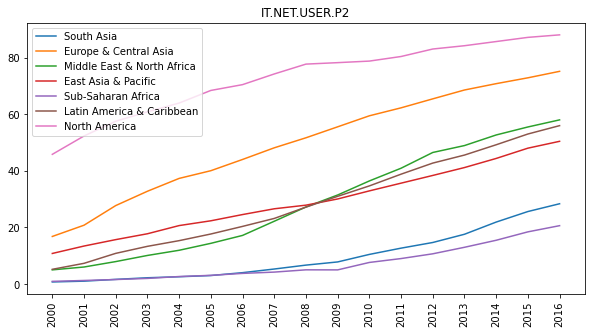

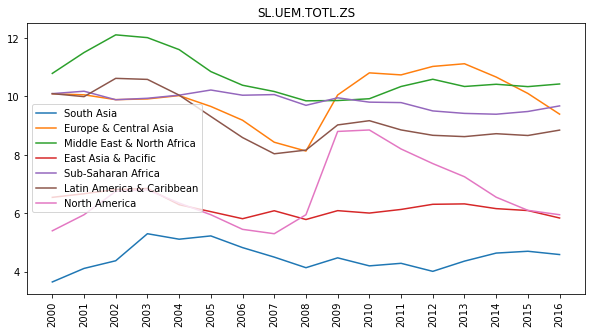

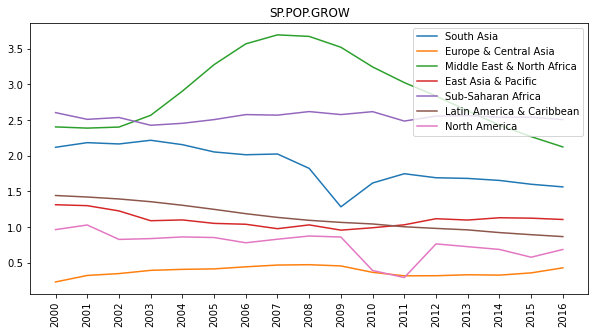

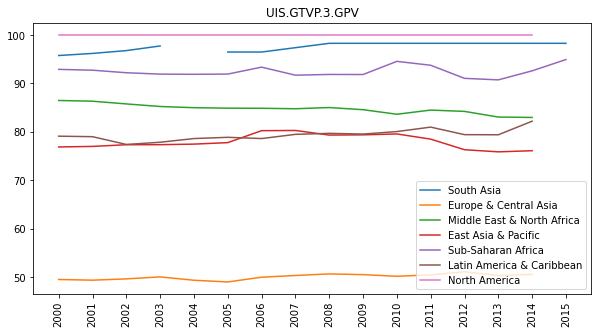

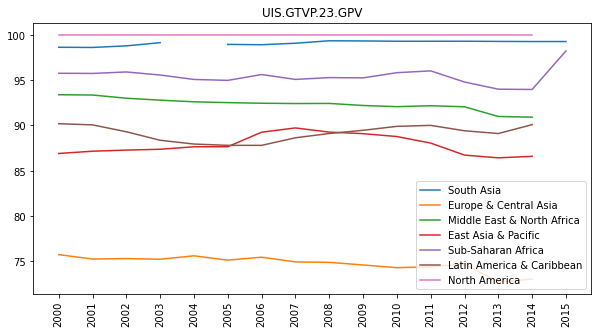

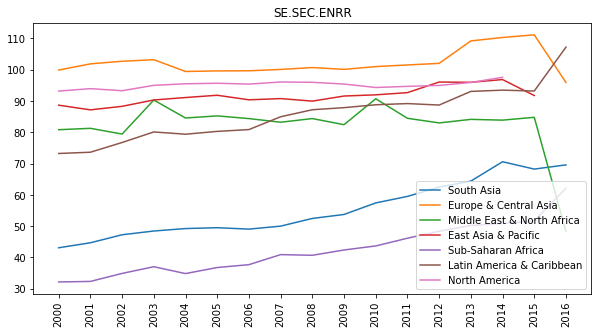

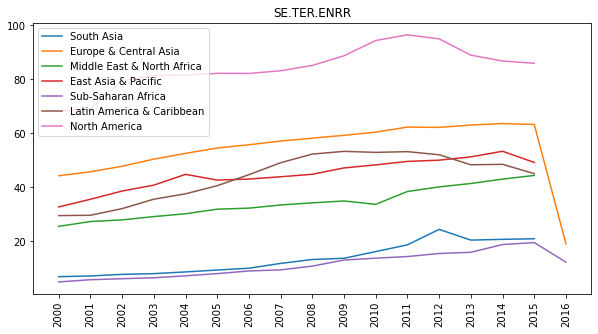

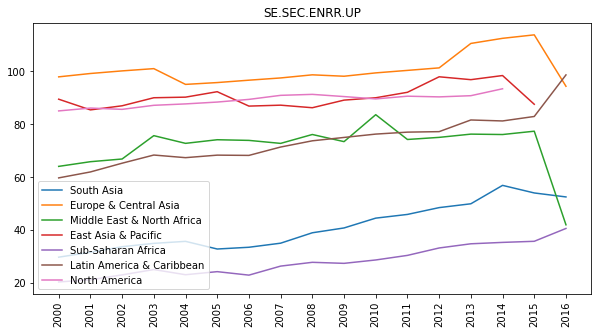

In [36]:
Indicators = [ 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW',
            'UIS.GTVP.3.GPV', 'UIS.GTVP.23.GPV', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']

for match in Indicators:
    
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes()
    plt.title(match)
    plt.xticks(rotation=90)
    
    for area in df_indic_combined['Region'].dropna().unique():
            ax.plot(regions_list.loc[area,match], label=area)
            plt.legend()

__RANKING OF CANDIDATE REGIONS__

In [37]:

region_scores = pd.DataFrame(regions_list.mean(axis=1).groupby(['Region']).mean())

region_overall_rating = pd.DataFrame([region_scores.index,region_scores.values]).T
region_overall_rating.columns = ['Region','Score']
region_overall_rating = region_overall_rating.sort_values(by=['Score'], ascending=False)

region_overall_rating.index = np.arange(1, len(region_overall_rating)+1)

#region_overall_rating = region_overall_rating['Score'].astype(float).round(2)
region_overall_rating

,Region,Score
1,North America,[68.55228924859877]
2,Europe & Central Asia,[55.241478827693044]
3,East Asia & Pacific,[53.63434406983985]
4,Latin America & Caribbean,[51.376626723153244]
5,Middle East & North Africa,[50.934480656314946]
6,South Asia,[40.31854748069267]
7,Sub-Saharan Africa,[36.17285323891502]


__RANKING OF CANDIDATE COUNTRIES__

In [38]:
country_scores = pd.DataFrame(country_list.mean(axis=1).groupby(['Country Name']).mean())

country_overall_rating = pd.DataFrame([country_scores.index,country_scores.values]).T
country_overall_rating.columns = ['Country','Score']
country_overall_rating = country_overall_rating.sort_values(by= ['Score'], ascending=False)
country_overall_rating.index = np.arange(1, len(country_overall_rating)+1)
country_overall_rating


,Country,Score
1,Australia,[75.25269925112049]
2,New Zealand,[68.21192694397098]
3,Finland,[68.19959468834003]
4,United States,[67.84537498590346]
5,Denmark,[67.2447406331067]
...,...,...
206,Isle of Man,[0.8922453220456128]
207,Palau,[0.7655427474726175]
208,Kosovo,[0.1782169338800201]
209,American Samoa,[-0.1226047158785429]
